In [13]:
#Load Libraries
library("ggplot2")
library("data.table")
library('stringr')

In [2]:
#Read train and test data
train <- fread(input = "../input/train.tsv", header=TRUE, stringsAsFactors = FALSE, sep='\t')
test <- fread(input = "../input/test.tsv", header=TRUE, stringsAsFactors = FALSE, sep='\t')
train <- data.frame(train)
test <- data.frame(test)

Read 1482535 rows and 8 (of 8) columns from 0.315 GB file in 00:00:18
Read 693359 rows and 7 (of 7) columns from 0.144 GB file in 00:00:10


In [3]:
#Structure of dataset train
str(train)
#Structure of dataset test
str(test)

'data.frame':	1482535 obs. of  8 variables:
 $ train_id         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ name             : chr  "MLB Cincinnati Reds T Shirt Size XL" "Razer BlackWidow Chroma Keyboard" "AVA-VIV Blouse" "Leather Horse Statues" ...
 $ item_condition_id: int  3 3 1 1 1 3 3 3 3 3 ...
 $ category_name    : chr  "Men/Tops/T-shirts" "Electronics/Computers & Tablets/Components & Parts" "Women/Tops & Blouses/Blouse" "Home/Home Décor/Home Décor Accents" ...
 $ brand_name       : chr  "" "Razer" "Target" "" ...
 $ price            : num  10 52 10 35 44 59 64 6 19 8 ...
 $ shipping         : int  1 0 1 1 0 0 0 1 0 0 ...
 $ item_description : chr  "No description yet" "This keyboard is in great condition and works like it came out of the box. All of the ports are tested and work"| __truncated__ "Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!" "New with tags. Leather horses. Retail for [rm] each. Stand about a fo

In [4]:
summary(train$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.00   17.00   26.74   29.00 2009.00 

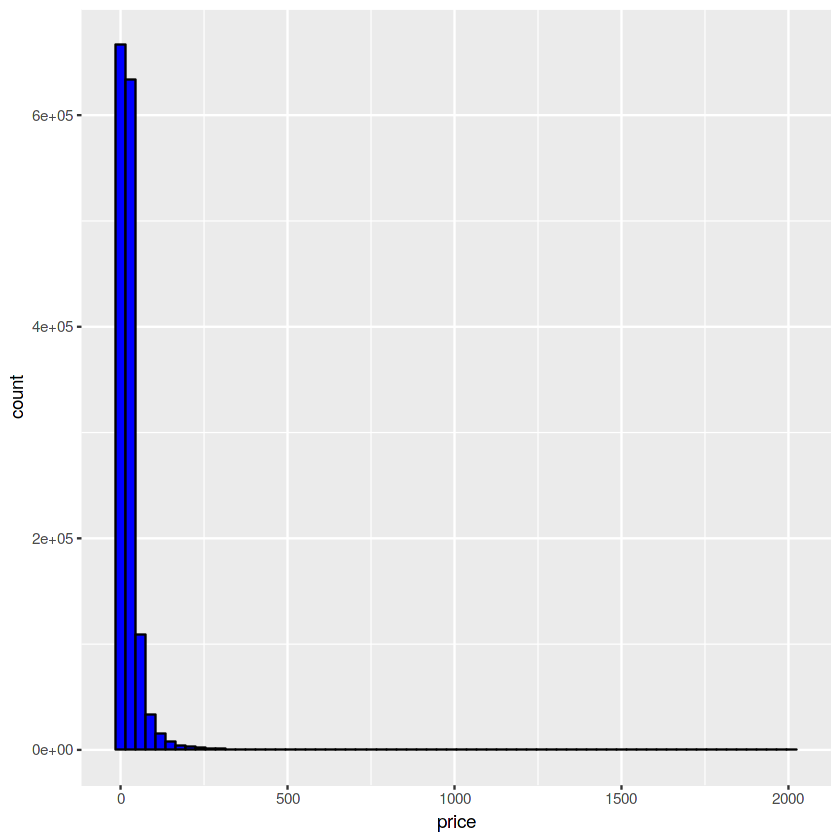

In [5]:
#Plot histogram of Price
ggplot(train, aes(x = price)) + geom_histogram(fill="blue", colour = "black", binwidth = 30)

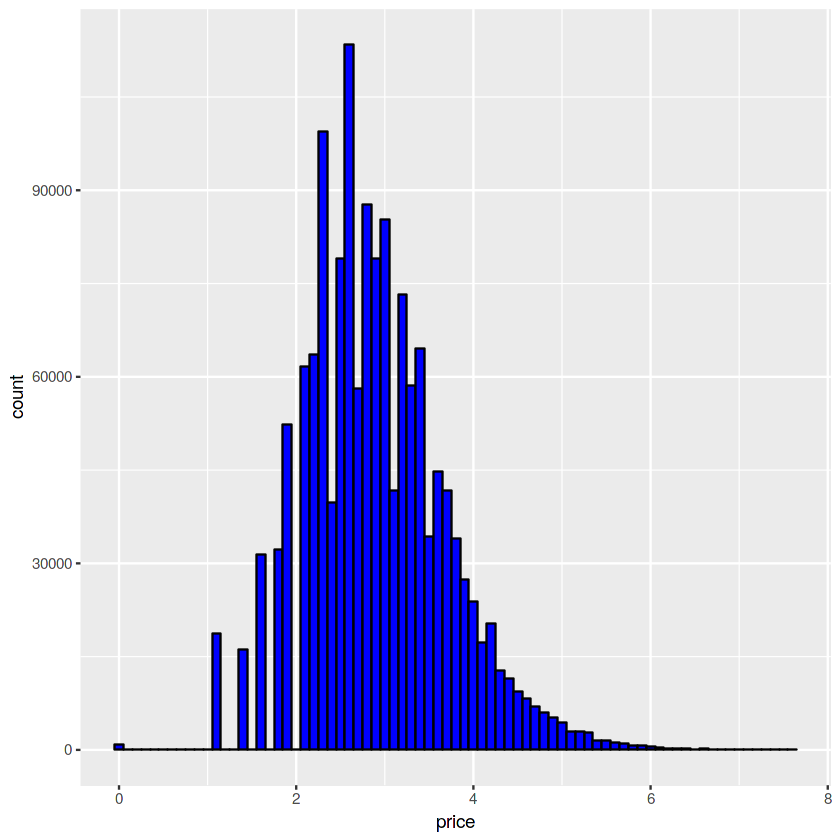

In [6]:
#Perform log transformation on price
train$price <- with(train, ifelse(price>0, log(price), price))
#Plot histogram of transformed price
ggplot(train, aes(x = price)) + geom_histogram(fill = "blue", colour = "black", binwidth = 0.1)

In [7]:
#Combine train and test
price_train <- train[,"price"]
train <- train[, -which(names(train) %in% c("price"))]
train_num_rows <- dim(train)[1]
test_num_rows <- dim(test)[1]
colnames(train)[1] <- "id"
colnames(test)[1] <- "id"
train_test <- rbind(train, test)

In [8]:
#Missing Values Analysis
apply(train_test, 2, function(x){sum(is.na(x) | x == "")})

id              name item_condition_id     category_name 
                0                 0                 0              9385 
       brand_name          shipping  item_description 
           928207                 0                 4

'data.frame':	9 obs. of  2 variables:
 $ Var1: Factor w/ 9 levels "Nike","PINK",..: 1 2 3 4 5 6 7 8 9
 $ Freq: int  79277 79092 70508 45598 25435 22327 22156 21391 20335


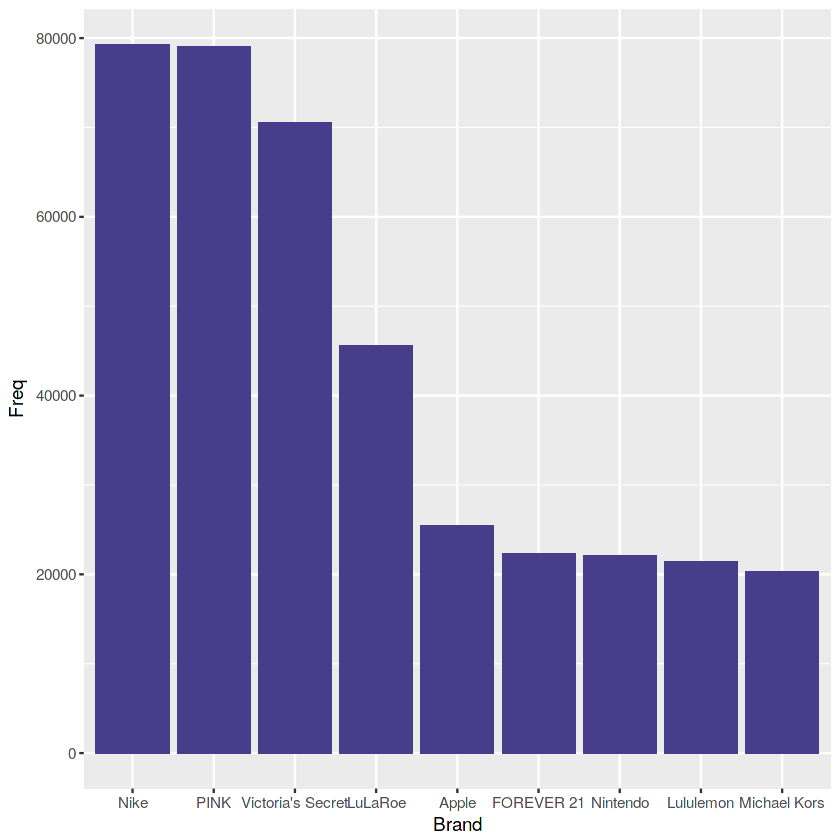

In [11]:
#Plot brands and their frequency
train_test$brand_name[train_test$brand_name=="" | is.na(train_test$brand_name)] <- "Missing_Brand"
#Not considering missing brand
top_brands <- sort(table(train_test$brand_name), decreasing = T)[2:10]
top_brands <- data.frame(top_brands)
str(top_brands)
ggplot(top_brands, aes(x = Var1, y = Freq)) + geom_bar(stat="identity",fill= "DarkSlateBlue") + xlab("Brand")  #+ scale_x_discrete(labels = abbreviate)


In [14]:
#Separate out the three levels of category
train_test$category_name[train_test$category_name == "" | is.na(train_test$category_name)] <- "Missing1/Missing2/Missing3"
train_test$level1_category <- str_split_fixed(train_test$category_name, "/" ,3)[,1]
train_test$level2_category <- str_split_fixed(train_test$category_name, "/" ,3)[,2]
train_test$level3_category <- str_split_fixed(train_test$category_name, "/" ,3)[,3]

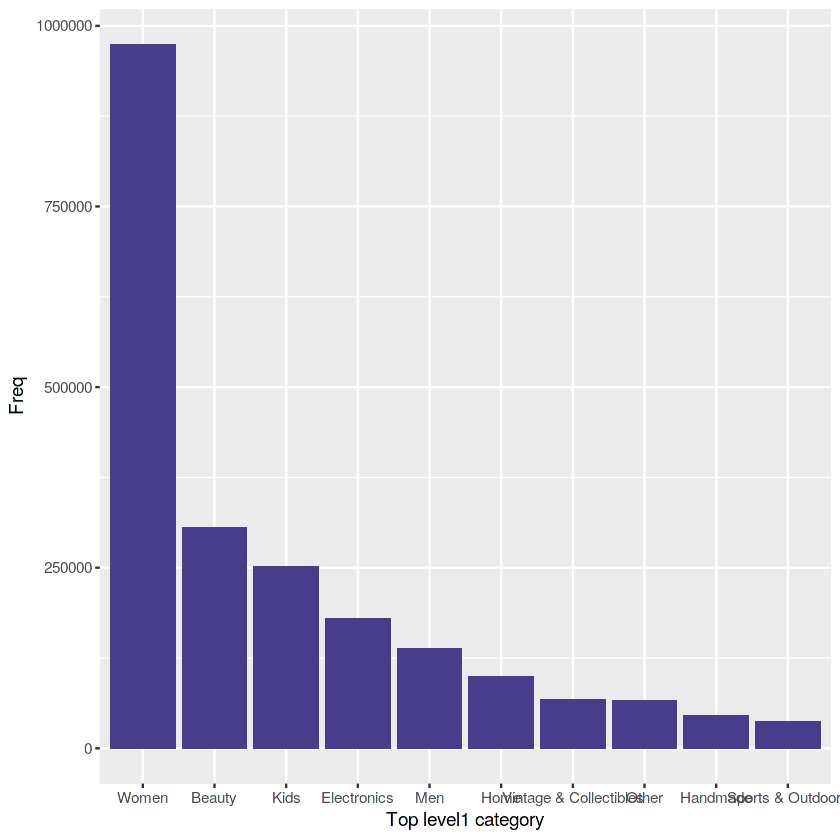

In [16]:
#Select level1_category and their frequencies
top_l1_cat <- sort(table(train_test$level1_category), decreasing = T)[1:10]
top_l1_cat <- data.frame(top_l1_cat)
ggplot(top_l1_cat, aes(x = Var1, y = Freq)) + geom_bar(stat="identity",fill= "DarkSlateBlue") + xlab("Top level1 category")

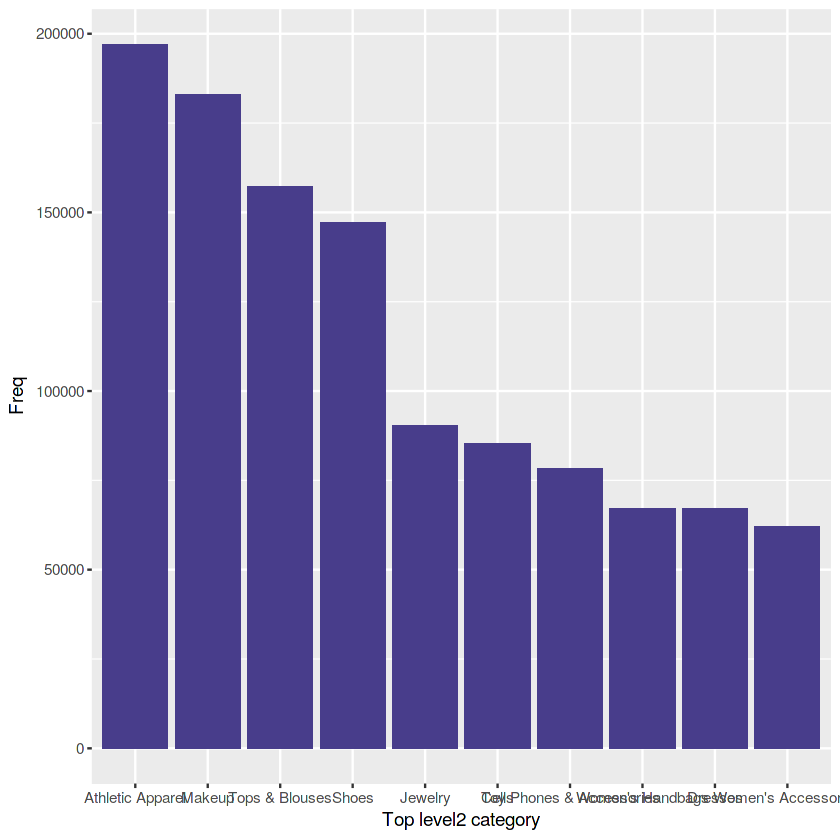

In [15]:
#Select level2_category and their frequencies
top_l2_cat <- sort(table(train_test$level2_category), decreasing = T)[1:10]
top_l2_cat <- data.frame(top_l2_cat)
ggplot(top_l2_cat, aes(x = Var1, y = Freq)) + geom_bar(stat="identity",fill= "DarkSlateBlue") + xlab("Top level2 category")

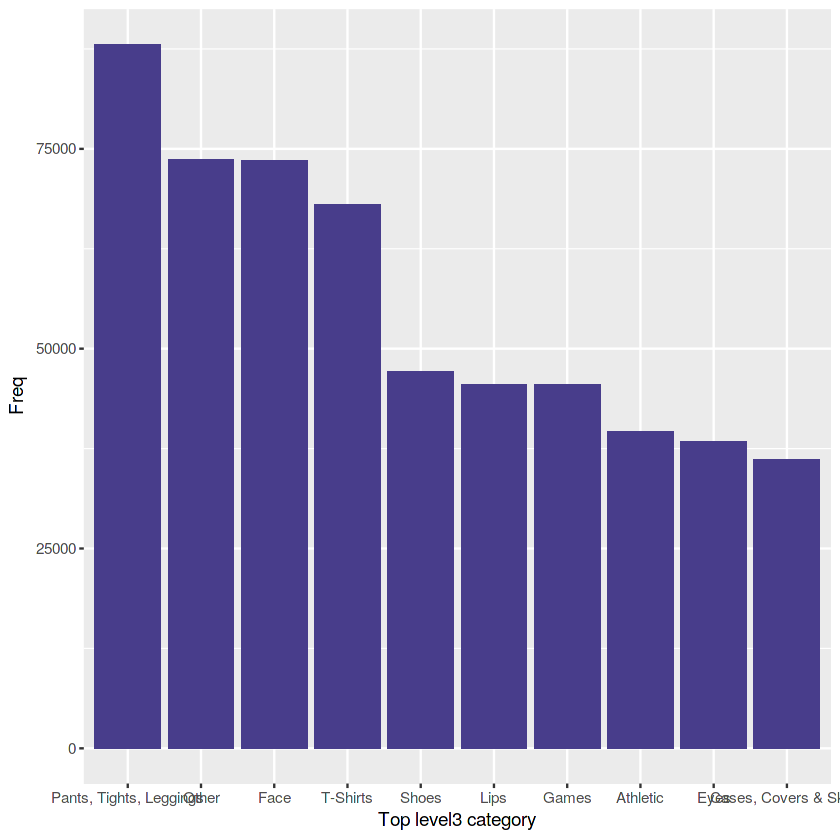

In [17]:
#Select level3_category and their frequencies
top_l3_cat <- sort(table(train_test$level3_category), decreasing = T)[1:10]
top_l3_cat <- data.frame(top_l3_cat)
ggplot(top_l3_cat, aes(x = Var1, y = Freq)) + geom_bar(stat="identity",fill= "DarkSlateBlue") + xlab("Top level3 category")